In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4th year/ML/mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns='label', inplace=True)
df.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 784)

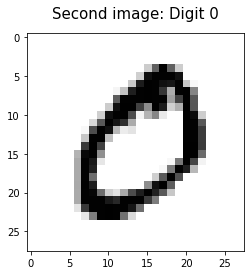

In [ ]:
second_image = df.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

In [ ]:
print(df.iloc[1].min())
print(df.iloc[1].max())

0
255


# PCA

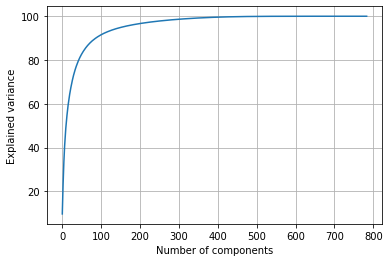

In [ ]:
pca_784 = PCA(n_components=784)
pca_784.fit(df)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

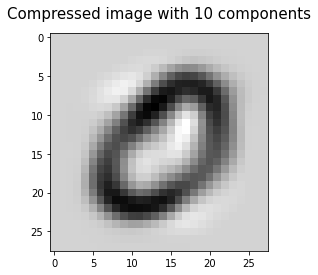

In [ ]:

pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(df)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.savefig("image_pca_10.png")

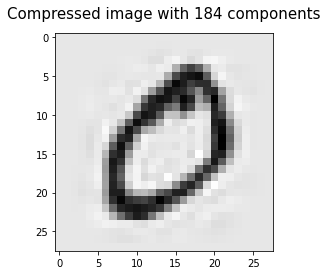

In [ ]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(df)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)
plt.savefig("/content/drive/MyDrive/4th year/ML/image_pca_184.png")

In [ ]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]

96.12379554801625

In [ ]:
#96% of the variability in the original image data